# LR: Graduate Admission

Source of data: [Kaggle](https://www.kaggle.com/nitindatta/graduate-admission-chances)


In [122]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [124]:
df = pd.read_csv("https://raw.githubusercontent.com/abbylmm/DS_Uncut/main/admission_predict.csv")
df.sample(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
136,137,312,103,3,5.0,4.0,8.45,0,0.76
139,140,318,109,1,3.5,3.5,9.12,0,0.78
243,244,325,114,3,3.5,3.0,9.04,1,0.76
177,178,319,110,3,3.5,3.5,9.04,0,0.82
156,157,315,105,3,2.0,2.5,8.34,0,0.70


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [126]:
df2 = df.rename(columns={"Chance of Admit ": "Chance_of_Admit", 
                         "GRE Score": "GRE_Score", 
                         "TOEFL Score": "TOEFL_Score", 
                         "University Rating": "University_Rating", 
                         "Serial No.": "Serial_No"
                        })

In [127]:
df2 = df2.drop("Serial_No", axis=1)
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
GRE_Score,400.0,316.807500,11.473646,290.00,308.00,317.00,325.0000,340.00
TOEFL_Score,400.0,107.410000,6.069514,92.00,103.00,107.00,112.0000,120.00
University_Rating,400.0,3.087500,1.143728,1.00,2.00,3.00,4.0000,5.00
SOP,400.0,3.400000,1.006869,1.00,2.50,3.50,4.0000,5.00
LOR,400.0,3.452500,0.898478,1.00,3.00,3.50,4.0000,5.00
CGPA,400.0,8.598925,0.596317,6.80,8.17,8.61,9.0625,9.92
Research,400.0,0.547500,0.498362,0.00,0.00,1.00,1.0000,1.00
Chance_of_Admit,400.0,0.724350,0.142609,0.34,0.64,0.73,0.8300,0.97


Text(31.663300000000007, 0.5, 'Chance_of_Admit')

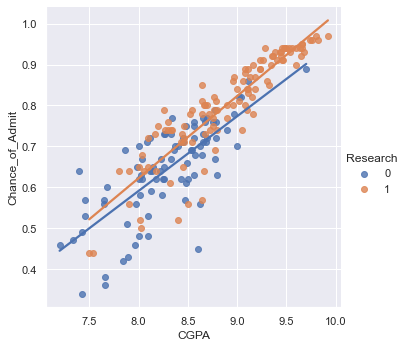

In [128]:
sns.lmplot(x="CGPA", 
           y="Chance_of_Admit", 
           hue="Research",
           ci=None,
           data=df2.sample(200),
           height=5)
plt.xlabel("CGPA")
plt.ylabel("Chance_of_Admit")

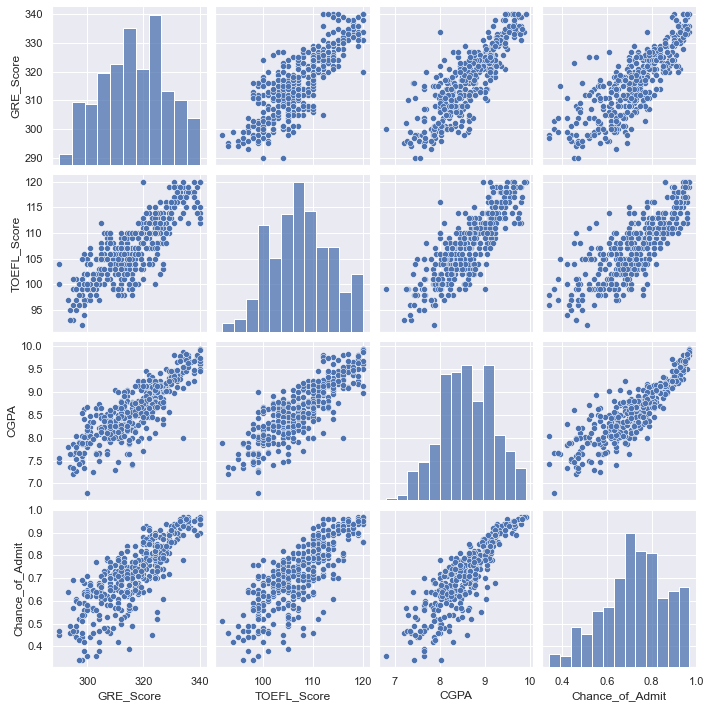

In [129]:
sns.pairplot(data = df2[['GRE_Score', 'TOEFL_Score', 'CGPA', 'Chance_of_Admit']])

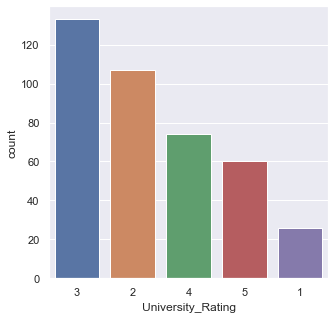

In [130]:
sns.set(rc={'figure.figsize':(5,5)})
fb = sns.countplot(x='University_Rating', data=df2, order=df2['University_Rating'].value_counts().index)

C:\Users\munmun\AppData\Local\Temp/ipykernel_2884/130349624.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


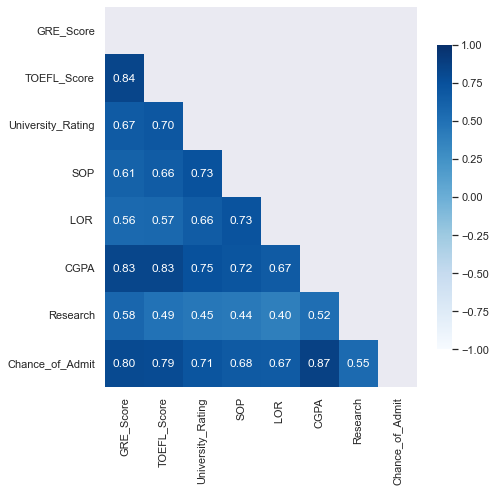

In [131]:
fig, ax = plt.subplots(figsize=(7, 7))
corr = df2.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap="Blues", vmin=-1, vmax=1, cbar_kws={"shrink": .8})
plt.show()

In [132]:
features = ['GRE_Score', 'TOEFL_Score', 'CGPA', 'Research', 'University_Rating']

train_data = df2[features]
train_target = df2['Chance_of_Admit']

train_X, test_X, train_y, test_y = train_test_split(train_data, train_target, test_size=0.3, random_state=1)

In [133]:
reg = LinearRegression()
reg.fit(train_X, train_y)

LinearRegression()

In [134]:
reg.intercept_

-1.0354381120505187

In [135]:
reg.coef_

array([0.00117376, 0.00246322, 0.1228861 , 0.03250787, 0.01658312])

In [136]:
string = "R-square = {R:.2%}"
R = reg.score(test_X, test_y)
print(string.format(R = R))

R-square = 80.10%


In [137]:
new_df = pd.DataFrame({'GRE_Score':[300,330], 
                       'TOEFL_Score':[111,108], 
                       'CGPA':[7,9], 
                       'Research':[0,1], 
                       'University_Rating':[3,2]})
new_df = new_df[['GRE_Score', 'TOEFL_Score', 'CGPA', 'Research', 'University_Rating']]
new_df

,GRE_Score,TOEFL_Score,CGPA,Research,University_Rating
0,300,111,7,0,3
1,330,108,9,1,2


In [138]:
predict = reg.predict(new_df)
predictdf = pd.DataFrame({'Predicted_Chance_of_Admit':predict})
new_df2 = new_df.join(predictdf)
new_df2.rename(index={0:'Application 1', 1:'Application 2'})

,GRE_Score,TOEFL_Score,CGPA,Research,University_Rating,Predicted_Chance_of_Admit
Application 1,300,111,7,0,3,0.500058
Application 2,330,108,9,1,2,0.789578
